# [RQ1]

In [16]:
import json
import pandas as pd
import requests
import numpy
import matplotlib.pyplot as plt

## Import the team data

In [52]:

team=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\teams.json")
pd.set_option('display.max_rows', 142)
pd.set_option('display.max_columns', 12)
#From index 98, the type is given as Nation. So we don't need that.
team=team[:98]
#convert the area from a series to a list
#Convert the list into a dataframe and concate the dataframe to the parent data i.e. team.
#Drop the column 'area'
team = pd.concat([team,pd.DataFrame(list(team['area']))],axis = 1).drop('area',axis = 1)
team

,city,name,wyId,officialName,type,name,id,alpha3code,alpha2code
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,club,England,0,XEN,
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,club,Spain,724,ESP,ES
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,club,Spain,724,ESP,ES
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,club,Spain,724,ESP,ES
4,Valencia,Levante,695,Levante UD,club,Spain,724,ESP,ES
5,Troyes,Troyes,3795,Esp\u00e9rance Sportive Troyes Aube Champagne,club,France,250,FRA,FR
6,Getafe (Madrid),Getafe,698,Getafe Club de F\u00fatbol,club,Spain,724,ESP,ES
7,M\u00f6nchengladbach,Borussia M'gladbach,2454,Borussia VfL M\u00f6nchengladbach,club,Germany,276,DEU,DE
8,"Huddersfield, West Yorkshire",Huddersfield Town,1673,Huddersfield Town FC,club,England,0,XEN,
9,Bilbao,Athletic Club,678,Athletic Club Bilbao,club,Spain,724,ESP,ES


#### Note that column 2 and column 9 are both called 'name'

In [54]:
# changing column name: The column tht contains the country names is converted into "country"
t=list(team.columns)
t[5]='country'
t
team.columns=t
team

,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,club,England,0,XEN,
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,club,Spain,724,ESP,ES
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,club,Spain,724,ESP,ES
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,club,Spain,724,ESP,ES
4,Valencia,Levante,695,Levante UD,club,Spain,724,ESP,ES
5,Troyes,Troyes,3795,Esp\u00e9rance Sportive Troyes Aube Champagne,club,France,250,FRA,FR
6,Getafe (Madrid),Getafe,698,Getafe Club de F\u00fatbol,club,Spain,724,ESP,ES
7,M\u00f6nchengladbach,Borussia M'gladbach,2454,Borussia VfL M\u00f6nchengladbach,club,Germany,276,DEU,DE
8,"Huddersfield, West Yorkshire",Huddersfield Town,1673,Huddersfield Town FC,club,England,0,XEN,
9,Bilbao,Athletic Club,678,Athletic Club Bilbao,club,Spain,724,ESP,ES


#### Adding necessary filters

In [55]:
#As this is premier league, we need information solely based on England.
team=team[team.country=='England']
team

,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,club,England,0,XEN,
8,"Huddersfield, West Yorkshire",Huddersfield Town,1673,Huddersfield Town FC,club,England,0,XEN,
26,"Bournemouth, Dorset",AFC Bournemouth,1659,AFC Bournemouth,club,England,0,XEN,
27,"Brighton, East Sussex",Brighton & Hove Albion,1651,Brighton & Hove Albion FC,club,England,0,XEN,
39,"Burnley, Lancashire",Burnley,1646,Burnley FC,club,England,0,XEN,
54,Leicester,Leicester City,1631,Leicester City FC,club,England,0,XEN,
55,London,West Ham United,1633,West Ham United FC,club,England,0,XEN,
56,Stoke-on-Trent,Stoke City,1639,Stoke City FC,club,England,0,XEN,
60,Watford,Watford,1644,Watford FC,club,England,0,XEN,
65,Liverpool,Everton,1623,Everton FC,club,England,0,XEN,


#### Note that the index is not increasing by 1, instead it is 0, 8, 26 ...

#### This can be problematic in case this dataframe is merged/joined/concatinated to some other dataframe as these functions work on the basis of indices

In [ ]:
# we use reset_index() method to reset the index to 0,1,2,...
# the argument drop is set to true in order to drop the newly generated column 'index' 
# which preserves the original indices of the rows prior to reset 
team=team.reset_index(drop=True)
team

##  Import the matches data

In [10]:
matches= pd.read_json('C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\matches\\matches_England.json')
pd.set_option('display.max_columns', 14)
matches

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4405654,38,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",181150,2018-05-13 14:00:00,1659,Turf Moor,2500089,"Burnley - AFC Bournemouth, 1 - 2","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",Regular,364
1,Played,4405654,38,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",181150,2018-05-13 14:00:00,1628,Selhurst Park,2500090,"Crystal Palace - West Bromwich Albion, 2 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364
2,Played,4405654,38,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2018-05-13 14:00:00,1609,The John Smith's Stadium,2500091,"Huddersfield Town - Arsenal, 0 - 1","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 384965, 'role': 'referee'}, {'r...",Regular,364
3,Played,4405654,38,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",181150,2018-05-13 14:00:00,1612,Anfield,2500092,"Liverpool - Brighton & Hove Albion, 4 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385704, 'role': 'referee'}, {'r...",Regular,364
4,Played,4405654,38,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",181150,2018-05-13 14:00:00,1611,Old Trafford,2500093,"Manchester United - Watford, 1 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381853, 'role': 'referee'}, {'r...",Regular,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Played,4405654,1,"{'1623': {'scoreET': 0, 'coachId': 268779, 'si...",181150,2017-08-12 14:00:00,1623,Goodison Park,2499723,"Everton - Stoke City, 1 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 385915, 'role': 'referee'}, {'r...",Regular,364
376,Played,4405654,1,"{'10531': {'scoreET': 0, 'coachId': 381291, 's...",181150,2017-08-12 14:00:00,0,St. Mary's Stadium,2499726,"Southampton - Swansea City, 0 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 385916, 'role': 'referee'}, {'r...",Regular,364
377,Played,4405654,1,"{'1659': {'scoreET': 0, 'coachId': 8934, 'side...",181150,2017-08-12 14:00:00,1627,The Hawthorns,2499728,"West Bromwich Albion - AFC Bournemouth, 1 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 379443, 'role': 'referee'}, {'r...",Regular,364
378,Played,4405654,1,"{'1644': {'scoreET': 0, 'coachId': 71037, 'sid...",181150,2017-08-12 11:30:00,0,Vicarage Road Stadium,2499727,"Watford - Liverpool, 3 - 3","August 12, 2017 at 1:30:00 PM GMT+2","[{'refereeId': 378952, 'role': 'referee'}, {'r...",Regular,364


In [11]:
results = matches.label.str.split(', ', n=1, expand=True).iloc[:,1].str.split(' - ', n=1, expand=True)
results
# results.columns = ['result_home','result_away']
results = pd.concat([matches['gameweek'],results,matches.label.str.split(', ', n=1, expand=True).iloc[:,0].str.split(' - ', n=1, expand=True)],1)
results.columns = ['gameweek','goal_home','goal_away','team_home','team_away']
results

,gameweek,goal_home,goal_away,team_home,team_away
0,38,1,2,Burnley,AFC Bournemouth
1,38,2,0,Crystal Palace,West Bromwich Albion
2,38,0,1,Huddersfield Town,Arsenal
3,38,4,0,Liverpool,Brighton & Hove Albion
4,38,1,0,Manchester United,Watford
...,...,...,...,...,...
375,1,1,0,Everton,Stoke City
376,1,0,0,Southampton,Swansea City
377,1,1,0,West Bromwich Albion,AFC Bournemouth
378,1,3,3,Watford,Liverpool


In [12]:
results['points_home'] = 0
results['points_away'] = 0
for i in range(results.shape[0]):
    if results.loc[i,'goal_home']>results.loc[i,'goal_away']:
        results.loc[i,'points_home']=3
    elif results.loc[i,'goal_home']<results.loc[i,'goal_away']:
        results.loc[i,'points_away']=3
    else:
        results.loc[i,'points_home']=1
        results.loc[i,'points_away']=1

In [13]:
home = results[['gameweek','team_home','points_home']]
away = results[['gameweek','team_away','points_away']]
home.columns = ['gameweek','team','points']
away.columns = ['gameweek','team','points']
points_table = pd.concat([home,away],0).groupby(['gameweek','team']).sum().reset_index()
points_table
# away

,gameweek,team,points
0,1,AFC Bournemouth,0
1,1,Arsenal,3
2,1,Brighton & Hove Albion,0
3,1,Burnley,3
4,1,Chelsea,0
...,...,...,...
755,38,Swansea City,0
756,38,Tottenham Hotspur,3
757,38,Watford,0
758,38,West Bromwich Albion,0


In [47]:
team_list = list(points_table.team.unique())
TeamLists = {i : [0] for i in team_list}
points_byweek = pd.DataFrame(index=team_list,columns=range(0,39))
points_byweek[0] = 0
for team in team_list:
    for week in range(1,39):
        points_byweek.loc[team,week]=points_byweek.loc[team,week-1]+int(points_table.loc[(points_table['gameweek']==week)&(points_table['team']==team),'points'])
table=points_byweek
table=table.sort_values(by=(38),ascending=False)
table=table.T
pd.set_option('display.max_columns', 20)
table

,Manchester City,Manchester United,Tottenham Hotspur,Liverpool,Chelsea,Arsenal,Burnley,Everton,Leicester City,Newcastle United,AFC Bournemouth,Crystal Palace,West Ham United,Watford,Brighton & Hove Albion,Huddersfield Town,Southampton,Stoke City,Swansea City,West Bromwich Albion
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,3,3,1,0,3,3,3,0,0,0,0,0,1,0,3,1,0,1,3
2,4,6,3,4,3,3,3,4,3,0,0,0,0,4,0,6,4,3,1,6
3,7,9,4,7,6,3,4,4,3,3,0,0,0,5,1,7,5,4,4,7
4,10,10,7,7,9,6,7,4,3,6,0,0,3,8,4,7,5,5,4,7
5,13,13,8,8,10,7,8,4,4,9,3,0,4,8,4,8,8,5,5,8
6,16,16,11,11,13,10,9,7,4,9,3,0,4,11,7,9,8,5,5,8
7,19,19,14,12,13,13,12,7,5,10,4,0,7,12,7,9,8,8,5,9
8,22,20,17,13,13,13,13,8,6,11,4,3,8,15,8,9,9,8,8,10
9,25,20,20,13,16,16,13,8,9,14,7,3,8,15,11,12,12,8,8,10


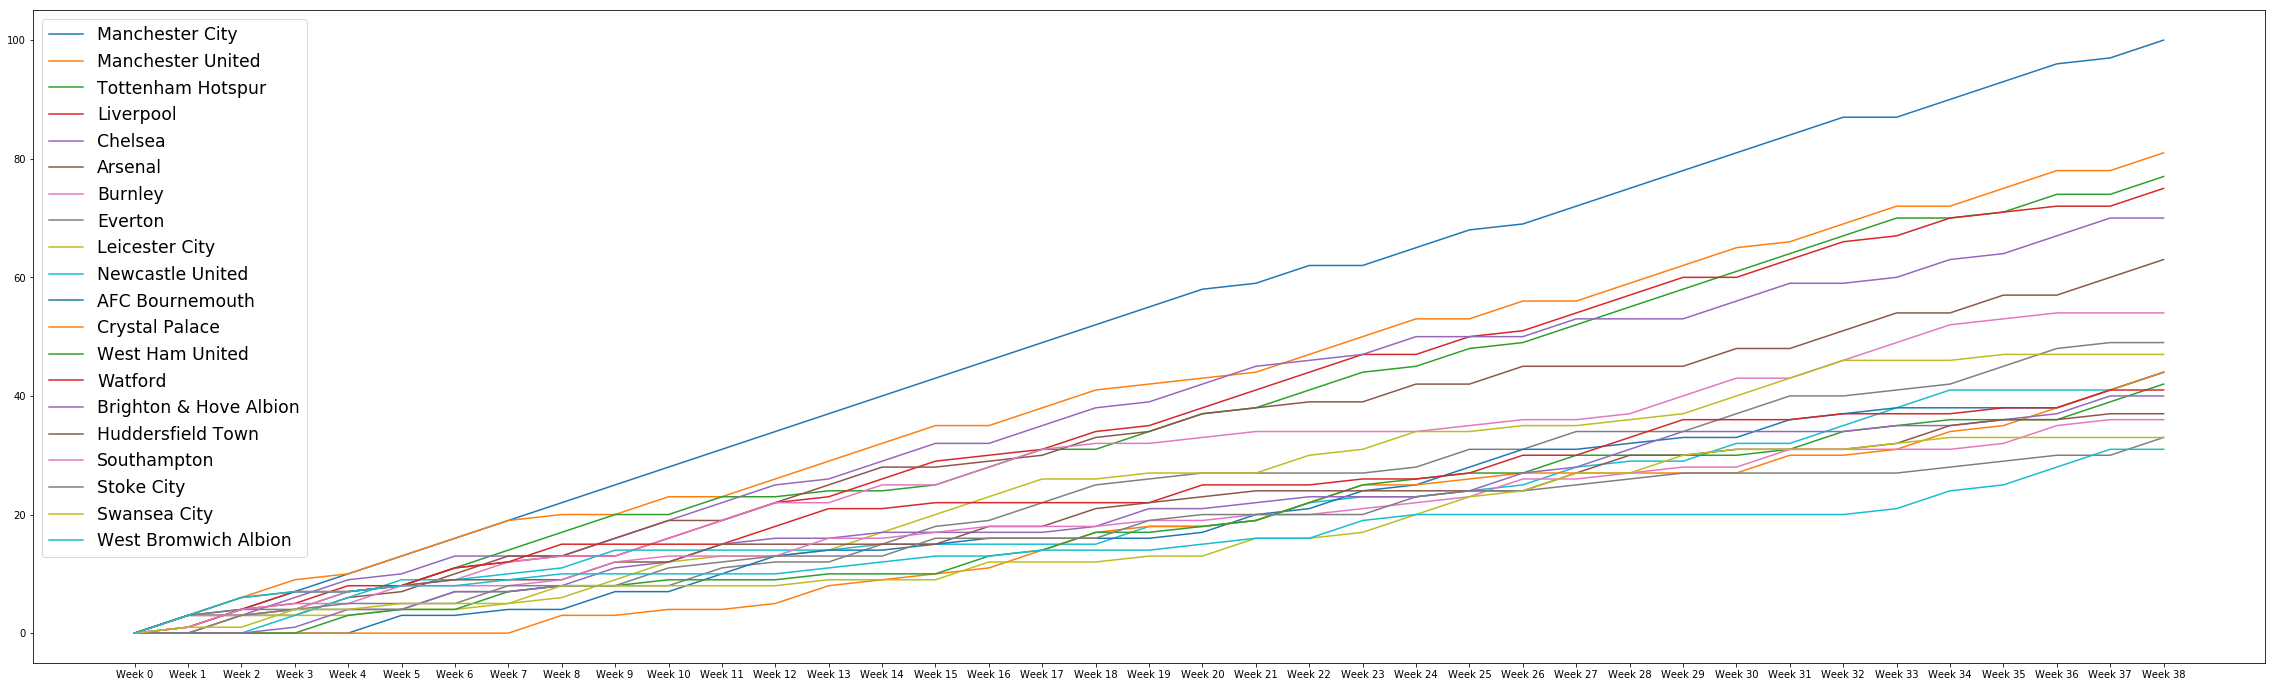

In [56]:
week = (['Week %i' %i for i in range(0, 39)])
week
plt.figure(figsize=(40,12))
fig=plt.plot(week,table)
plt.rcParams['axes.labelweight'] = 'bold'
plt.legend(table.columns,loc='best',fontsize='xx-large')

#### From the data and the plot we can see that the two teams which has the longest winning streak is Manchester city and Manchester united respectively. Manchester city made a chain 19 matches. On the other hand, the two teams with highest losing streak is West Bromwich Albion and Crystal palace.